In [659]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [865]:
from datasist.structdata import detect_outliers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler , PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , plot_confusion_matrix
from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
import joblib

In [660]:
%matplotlib inline
sns.set_theme(style='whitegrid' , rc = {'figure.figsize' : (10 , 4)})

In [759]:
df = pd.read_csv('data.csv')

In [760]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
2996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
2997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
2998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [762]:
df.isnull().mean()*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [763]:
df.duplicated().sum()

0

In [764]:
df['battery_power'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
battery_power,3000.0,1241.849,437.063804,500.0,863.75,1232.0,1619.0,1999.0


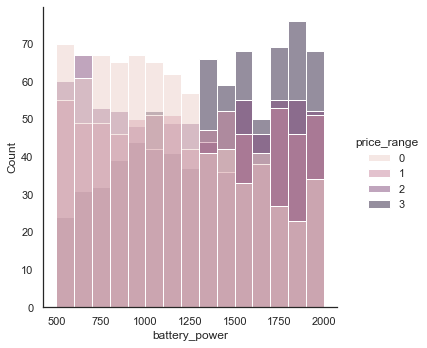

In [765]:
sns.displot(x = df['battery_power'] , hue = df['price_range'] )

In [766]:
df['blue'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='blue', ylabel='count'>

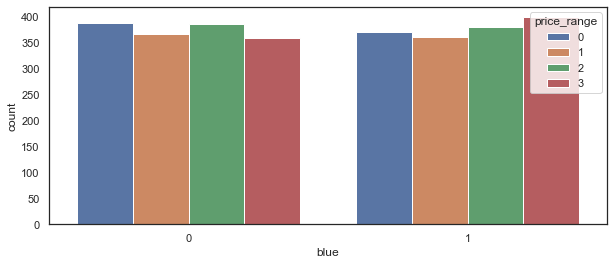

In [767]:
sns.countplot(df['blue'] , hue = df['price_range'])

In [768]:
df['clock_speed'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
clock_speed,3000.0,1.528467,0.820358,0.5,0.7,1.5,2.3,3.0


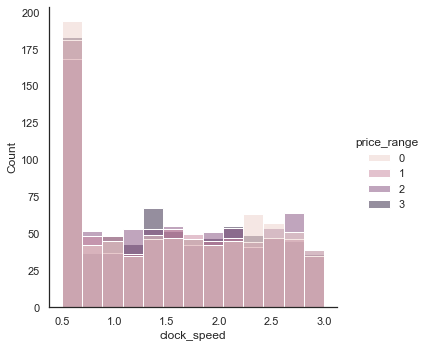

In [769]:
sns.displot(x = df['clock_speed'] , hue = df['price_range'])

In [770]:
df['dual_sim'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

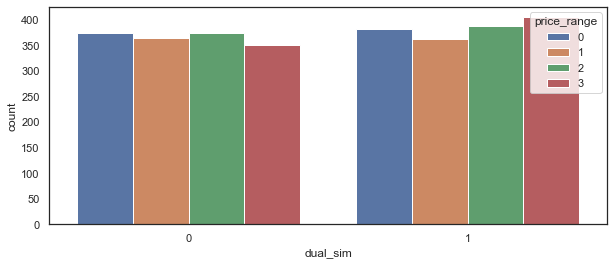

In [771]:
sns.countplot(df['dual_sim'] , hue = df['price_range'])

In [772]:
df['fc'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
fc,3000.0,4.404,4.383742,0.0,1.0,3.0,7.0,19.0


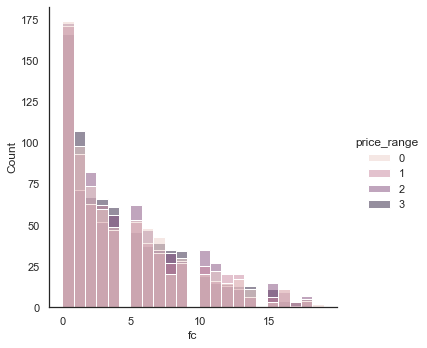

In [773]:
sns.displot(x = df['fc'] , hue = df['price_range'])

In [774]:
df['four_g'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='four_g', ylabel='count'>

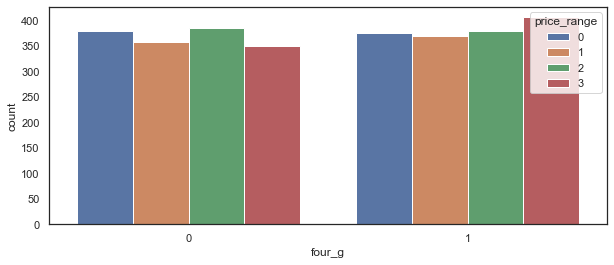

In [775]:
sns.countplot(df['four_g'] , hue = df['price_range'])

In [776]:
df['int_memory'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
int_memory,3000.0,32.581667,18.15281,2.0,16.0,33.0,48.0,64.0


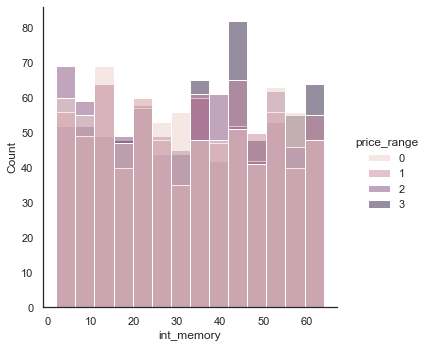

In [777]:
sns.displot(x = df['int_memory'] , hue = df['price_range'])

In [778]:
df['m_dep'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
m_dep,3000.0,0.507,0.285969,0.1,0.2,0.5,0.8,1.0


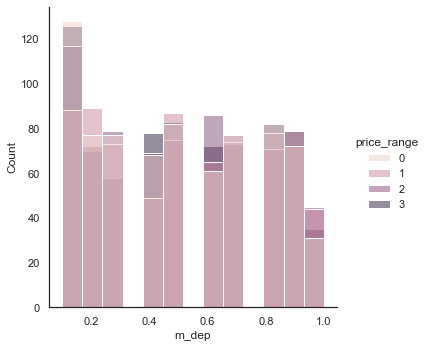

In [779]:
sns.displot(x = df['m_dep'], hue = df['price_range'])

In [780]:
df['mobile_wt'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
mobile_wt,3000.0,140.003,35.213809,80.0,109.0,140.0,170.0,200.0


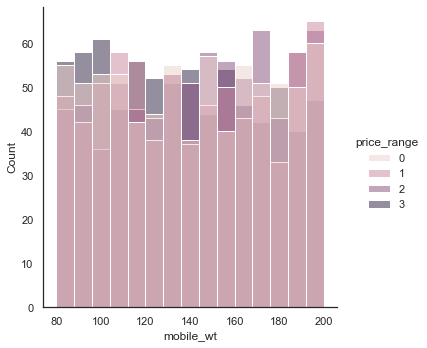

In [781]:
sns.displot(x = df['mobile_wt'] , hue = df['price_range'])

In [782]:
df['n_cores'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
n_cores,3000.0,4.456333,2.289361,1.0,2.0,4.0,6.0,8.0


<AxesSubplot:xlabel='n_cores', ylabel='count'>

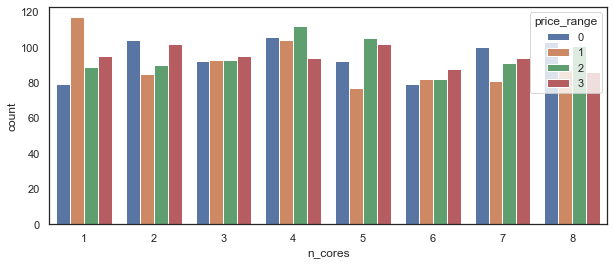

In [783]:
sns.countplot(x  = df['n_cores'] , hue = df['price_range'])

In [784]:
df['pc'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
pc,3000.0,9.962333,6.073923,0.0,5.0,10.0,15.0,20.0


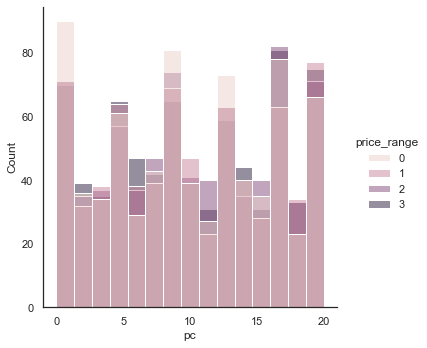

In [785]:
sns.displot(x = df['pc'] , hue = df['price_range'])

In [786]:
df['px_height'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
px_height,3000.0,639.112333,440.202998,0.0,277.75,564.0,932.5,1960.0


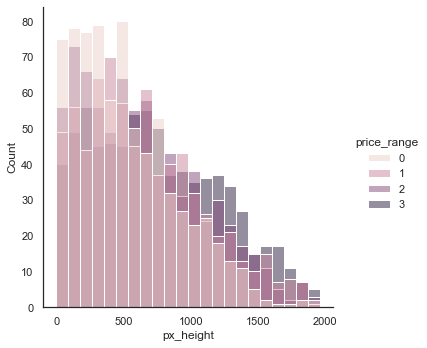

In [787]:
sns.displot(x = df['px_height'] , hue = df['price_range'])

<AxesSubplot:xlabel='px_height'>

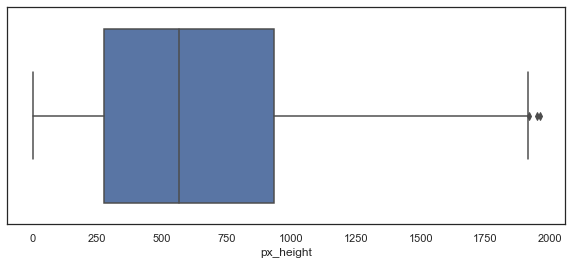

In [788]:
sns.boxplot(df['px_height'])

In [789]:
detect_outliers(df , 0 , ['px_height'])

[1894, 1988, 2771]

In [790]:
df.loc[detect_outliers(df , 0 , ['px_height'])]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1894,1497,1,0.7,0,5,0,32,0.7,92,3,...,1920,1933,1329,6,1,7,1,1,0,2
1988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
2771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


In [791]:
df['px_width'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
px_width,3000.0,1247.601667,434.666168,500.0,865.0,1248.0,1634.0,1998.0


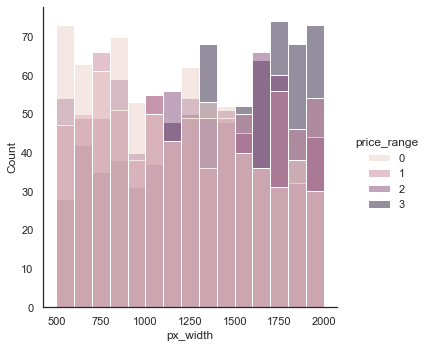

In [792]:
sns.displot(x = df['px_width'] , hue = df['price_range'])

<AxesSubplot:xlabel='px_width'>

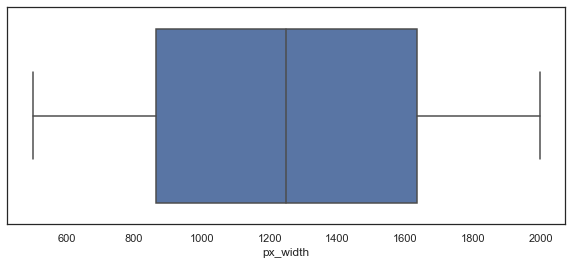

In [793]:
sns.boxplot(df['px_width'])

In [794]:
'''df['area'] = df['px_height'] * df['px_width']
df.drop(['px_height' , 'px_width'] , axis = 1 , inplace = True )'''

"df['area'] = df['px_height'] * df['px_width']\ndf.drop(['px_height' , 'px_width'] , axis = 1 , inplace = True )"

In [795]:
df['ram'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
ram,3000.0,2129.141333,1085.694231,256.0,1212.75,2147.5,3065.25,3998.0


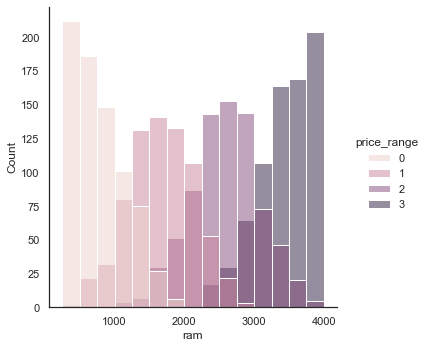

In [796]:
sns.displot(x = df['ram'] , hue = df['price_range'])

In [797]:
df['sc_h'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
sc_h,3000.0,12.202667,4.251151,5.0,9.0,12.0,16.0,19.0


<AxesSubplot:xlabel='sc_h', ylabel='count'>

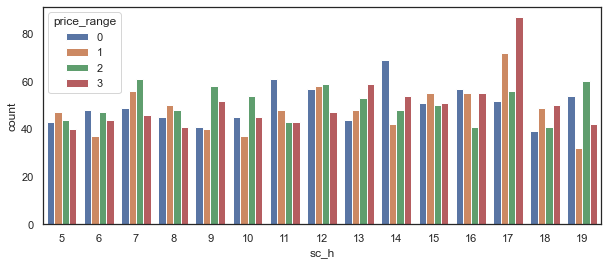

In [798]:
sns.countplot(df['sc_h'] , hue = df['price_range'])

In [799]:
df['sc_w'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
sc_w,3000.0,5.616667,4.322494,0.0,2.0,5.0,9.0,18.0


In [800]:
df['sc_w'].unique()

array([ 7,  0, 10,  8,  2,  9,  6,  5,  3, 12,  1, 11,  4, 13, 16, 14, 15,
       17, 18], dtype=int64)

<AxesSubplot:xlabel='sc_w', ylabel='count'>

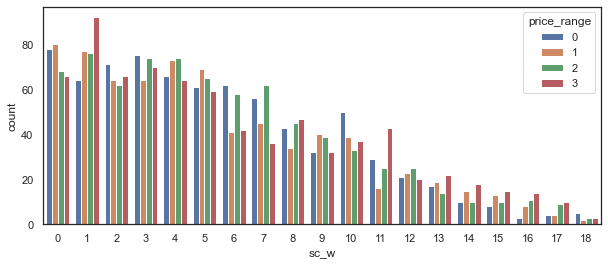

In [801]:
sns.countplot(df['sc_w'] , hue = df['price_range'])

In [802]:
df['talk_time'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
talk_time,3000.0,11.035667,5.4744,2.0,6.0,11.0,16.0,20.0


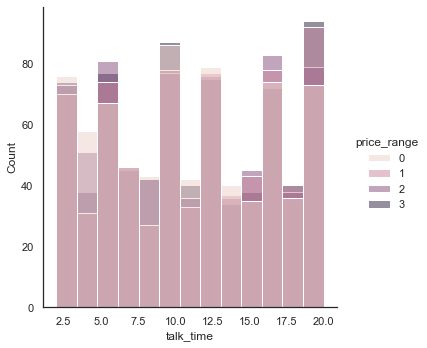

In [803]:
sns.displot(x = df['talk_time'] , hue = df['price_range'])

In [804]:
df['three_g'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='three_g', ylabel='count'>

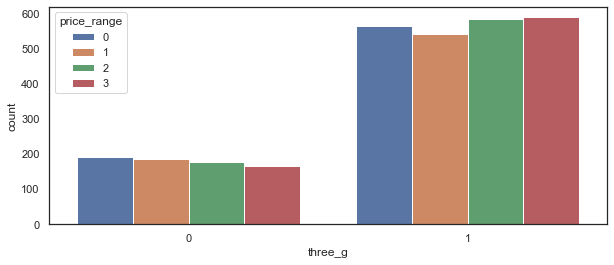

In [805]:
sns.countplot(df['three_g'] , hue = df['price_range'])

In [806]:
df['touch_screen'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

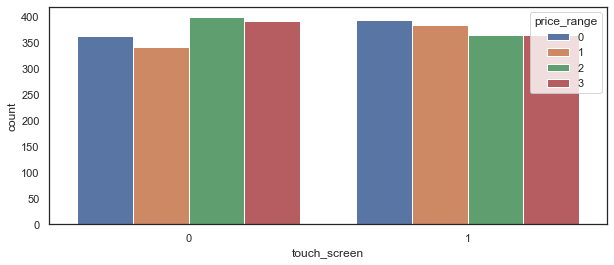

In [807]:
sns.countplot(df['touch_screen'] , hue = df['price_range'])

In [808]:
df['wifi'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='wifi', ylabel='count'>

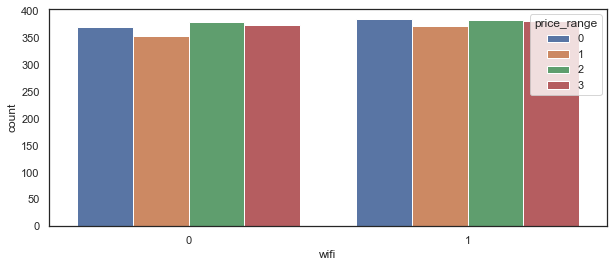

In [809]:
sns.countplot(df['wifi'] , hue = df['price_range'])

In [810]:
#df.drop(['wifi' , 'touch_screen' , 'px_height' , 'px_width' , 'blue' , 'dual_sim' , 'four_g'] , axis = 1 , inplace = True )

In [811]:
df['price_range'].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='price_range', ylabel='count'>

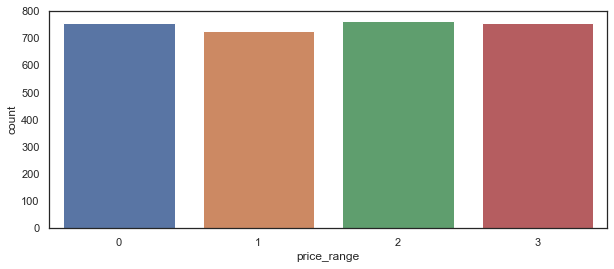

In [812]:
sns.countplot(df['price_range'])

In [814]:
models = []
models.append(('LR' , LogisticRegression(multi_class='ovr')))
models.append(('NB' , GaussianNB()))
models.append(('KNNC' , KNeighborsClassifier()))
models.append(('SVC' , SVC()))
models.append(('DTC' , DecisionTreeClassifier()))
models.append(('RFC' , RandomForestClassifier()))
models.append(('XGBC' , XGBClassifier()))

In [815]:
x , y = df.drop(['price_range'] , axis = 1 ) , df['price_range']

In [816]:
for model in models:
    steps = []
    if model[0] == 'NB':
        steps.append(('sclr' , MinMaxScaler()))
    else :
        steps.append(('sclr' , StandardScaler()))
    steps.append(model)
    PL = Pipeline(steps=steps)
    scores = cross_validate(estimator=PL , X = x , y = y , cv = 5 , return_train_score=True , scoring='accuracy')
    print('-'*40)
    print(model[0])
    print('train acc : '.title() , scores['train_score'].mean())
    print('test acc : '.title() , scores['test_score'].mean())

----------------------------------------
LR
Train Acc :  0.8683333333333334
Test Acc :  0.8593333333333332
----------------------------------------
NB
Train Acc :  0.8120833333333334
Test Acc :  0.8063333333333332
----------------------------------------
KNNC
Train Acc :  0.6989166666666666
Test Acc :  0.5076666666666666
----------------------------------------
SVC
Train Acc :  0.9869999999999999
Test Acc :  0.9046666666666665
----------------------------------------
DTC
Train Acc :  1.0
Test Acc :  0.8480000000000001
----------------------------------------
RFC
Train Acc :  1.0
Test Acc :  0.8923333333333334
----------------------------------------
XGBC
Train Acc :  1.0
Test Acc :  0.921


### Pick SVC For Tunning 

In [817]:
steps = []
steps.append(('sclr' , StandardScaler()))
steps.append(('Model' , SVC()))
PL = Pipeline(steps=steps)

In [819]:
params = [
    {
        'Model__C' : [0.01 , 0.1 , 1 , 0.001 , 0.0001 , 5 , 10] ,'Model__kernel' : ['linear']
    },
    {
        'Model__kernel' : ['poly'] , 'Model__degree':[2,3,4,5]
    },
    {
        'Model__kernel' : ['rbf'] , 'Model__gamma' : [0.1 , 1 , 0.001 , 0.0001 ]
    }
]

In [820]:
grid = GridSearchCV(estimator=PL , param_grid=params , cv = 5 , return_train_score=True , scoring='accuracy')

In [821]:
grid.fit(x , y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sclr', StandardScaler()),
                                       ('Model', SVC())]),
             param_grid=[{'Model__C': [0.01, 0.1, 1, 0.001, 0.0001, 5, 10],
                          'Model__kernel': ['linear']},
                         {'Model__degree': [2, 3, 4, 5],
                          'Model__kernel': ['poly']},
                         {'Model__gamma': [0.1, 1, 0.001, 0.0001],
                          'Model__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [822]:
grid.best_estimator_

Pipeline(steps=[('sclr', StandardScaler()),
                ('Model', SVC(C=10, kernel='linear'))])

In [823]:
grid.best_score_

0.9806666666666667

In [824]:
grid.cv_results_['mean_test_score'].max()

0.9806666666666667

In [825]:
grid.cv_results_['mean_train_score'].max()

1.0

In [826]:
grid.best_params_

{'Model__C': 10, 'Model__kernel': 'linear'}

In [827]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , stratify=y, shuffle=True,random_state=7)

In [828]:
Model = grid.best_estimator_

In [829]:
Model.fit(x_train , y_train)

Pipeline(steps=[('sclr', StandardScaler()),
                ('Model', SVC(C=10, kernel='linear'))])

In [830]:
y_train_prd = Model.predict(x_train)

In [831]:
accuracy_score(y_true=y_train , y_pred=y_train_prd)

0.9841666666666666

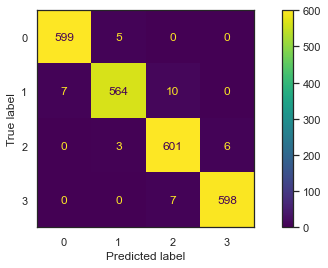

In [832]:
sns.set_theme(style='white')
plot_confusion_matrix(Model , x_train , y_train)

In [833]:
y_test_prd = Model.predict(x_test)

In [834]:
accuracy_score(y_true=y_test , y_pred=y_test_prd)

0.9866666666666667

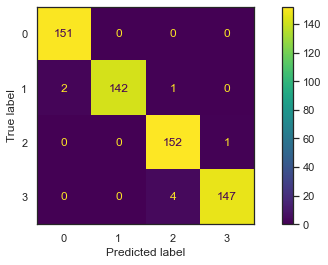

In [835]:
plot_confusion_matrix(Model , x_test , y_test)

In [838]:
BackElim = SequentialFeatureSelector(estimator=Model ,n_features_to_select = 'auto',tol = None ,direction="forward"  )

In [841]:
features  = pd.DataFrame(BackElim.fit_transform(x , y) , columns = BackElim.get_feature_names_out())

In [846]:
features # Most Important Feature For Model

,battery_power,int_memory,mobile_wt,n_cores,px_height,px_width,ram,sc_h,three_g,wifi
0,1043.0,5.0,193.0,3.0,226.0,1412.0,3476.0,12.0,0.0,0.0
1,841.0,61.0,191.0,5.0,746.0,857.0,3895.0,6.0,1.0,0.0
2,1807.0,27.0,186.0,3.0,1270.0,1366.0,2396.0,17.0,0.0,1.0
3,1546.0,25.0,96.0,8.0,295.0,1752.0,3893.0,10.0,1.0,0.0
4,1434.0,49.0,108.0,6.0,749.0,810.0,1773.0,15.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2995,794.0,2.0,106.0,6.0,1222.0,1890.0,668.0,13.0,1.0,0.0
2996,1965.0,39.0,187.0,4.0,915.0,1965.0,2032.0,11.0,1.0,1.0
2997,1911.0,36.0,108.0,8.0,868.0,1632.0,3057.0,9.0,1.0,0.0
2998,1512.0,46.0,145.0,5.0,336.0,670.0,869.0,18.0,1.0,1.0


In [857]:
x_train , x_test , y_train , y_test = train_test_split(features , y , test_size=0.2 , stratify=y, shuffle=True,random_state=7)

In [858]:
Model.fit(x_train , y_train)

Pipeline(steps=[('sclr', StandardScaler()),
                ('Model', SVC(C=10, kernel='linear'))])

In [859]:
y_train_prd = Model.predict(x_train)

In [860]:
accuracy_score(y_true=y_train , y_pred=y_train_prd)

0.985

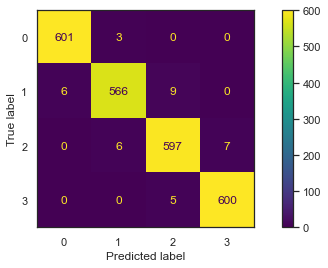

In [861]:
sns.set_theme(style='white')
plot_confusion_matrix(Model , x_train , y_train)

In [862]:
y_test_prd = Model.predict(x_test)

In [863]:
accuracy_score(y_true=y_test , y_pred=y_test_prd)

0.9916666666666667

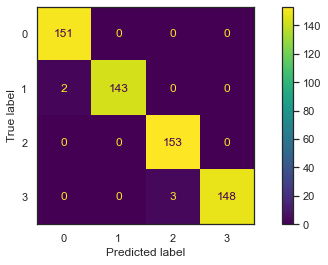

In [864]:
plot_confusion_matrix(Model , x_test , y_test)

In [866]:
joblib.dump(Model , 'Mobile Price Classifier.pkl')

['Mobile Price Classifier.pkl']

In [867]:
joblib.load('Mobile Price Classifier.pkl')

Pipeline(steps=[('sclr', StandardScaler()),
                ('Model', SVC(C=10, kernel='linear'))])